In [1]:
%matplotlib inline
from gensim import corpora, models, similarities
import gensim
import logging
import string
import os
import numpy as np
import numpy
import pickle
from gensim.models.coherencemodel import CoherenceModel

C:\Python27\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
with open("corp.cor") as cp: 
    corp = pickle.load(cp)
with open("sentances.sent") as sent: 
    sentances = pickle.load(sent)
    
dictionary = gensim.corpora.dictionary.Dictionary.load("Dicktionary")

In [3]:
start = 1
stop = 20
jump = 1

perplex = {}
coher = {}

try:
    for x in range(start, stop, jump): 
        print "processing {}".format(x)

        lda = gensim.models.ldamodel.LdaModel.load("data2lda{}.lda".format(x))

        cm = CoherenceModel(model=lda, corpus = corp, dictionary=dictionary, coherence = "u_mass")
        coherence = cm.get_coherence()

        perplexity = lda.bound(corp)

#         print perplexity
        perplex[x] = perplexity
#         print coherence
        coher[x] = coherence
except: 
    print "failed"

processing 1
-25306441.9092
-1.1649838164
processing 2
-24237602.5911
-1.25285733444
processing 3
-24084221.6295
-1.50293179065
processing 4
-23642653.741
-0.940889888875
processing 5
-23788435.469
-1.34687386732
processing 6
-23525356.3927
-0.971029909658
processing 7
-23515107.6094
-1.48237232873
processing 8
-23505023.2624
-1.43589885502
processing 9
-23532850.5349
-1.72708487896
processing 10
-23518529.3457
-1.68488514793
processing 11
-23522144.1397
-1.63870730577
processing 12
-23535279.3588
-2.32992835414
processing 13
-23595015.858
-2.45408636407
processing 14
-23497595.2057
-1.99575166617
processing 15
-23634799.3537
-2.46230304882
processing 16
-23630681.9766
-2.45818919123
processing 17
-23542642.0186
-2.30132991996
processing 18
-23603094.7047
-2.4814948521
processing 19
-23597348.5678
-2.32335619751


         Coherence    Perplexity
Cluster                         
1        -1.164984 -2.530644e+07
2        -1.252857 -2.423760e+07
3        -1.502932 -2.408422e+07
4        -0.940890 -2.364265e+07
5        -1.346874 -2.378844e+07
6        -0.971030 -2.352536e+07
7        -1.482372 -2.351511e+07
8        -1.435899 -2.350502e+07
9        -1.727085 -2.353285e+07
10       -1.684885 -2.351853e+07
11       -1.638707 -2.352214e+07
12       -2.329928 -2.353528e+07
13       -2.454086 -2.359502e+07
14       -1.995752 -2.349760e+07
15       -2.462303 -2.363480e+07
16       -2.458189 -2.363068e+07
17       -2.301330 -2.354264e+07
18       -2.481495 -2.360309e+07
19       -2.323356 -2.359735e+07


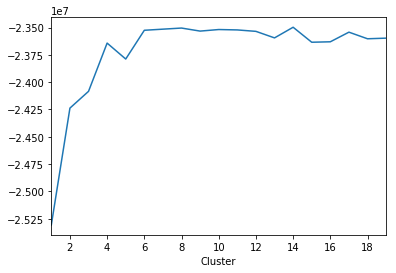

In [4]:
import pandas as pd

df = pd.DataFrame([x for x in perplex])



df["Coherence"] = [coher[x] for x in coher]
df["Perplexity"] = [perplex[x] for x in perplex]

df.columns = ["Cluster", "Coherence", "Perplexity"]

df = df.set_index(["Cluster"])

df = df.sort_index()
print df

# df["Coherence"].plot()
df["Perplexity"].plot()

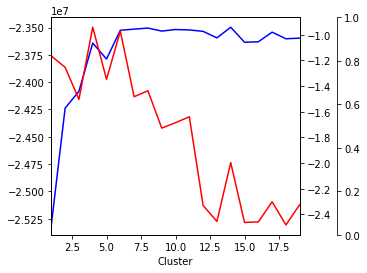

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df["Perplexity"].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
df["Coherence"].plot(ax=ax, style='r-', secondary_y=True)

